In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df=pd.read_csv("Spotify_war.csv",sep=";",on_bad_lines="skip")

C:\Users\salih\AppData\Local\Temp\ipykernel_33096\1280898931.py:1: DtypeWarning: Columns (5,8,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("Spotify_war.csv",sep=";",on_bad_lines="skip")


**EDA (Keşifsel Veri Analizi) yaparak cevaplarını bulmanız beklenen hedefler aşağıda verilmiştir:


1- En popüler 5 sanatçı

2- En gürültülü 5 parça

3- En çok dans edilebilen şarkıya sahip sanatçı

4- En iyi 10 enstrümental parça

5- 70'ten fazla popülariteye sahip parçaların akustikliği**

In [21]:
df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.0058200000000000005,0.743,238373.0,0.33899999999999997,0.0,1,0.0812,-7.678,1,0.409,20.392.700.000.000.000,4,0.11800000000000001,15,NaN,NaN,NaN
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.0244,0.846,214800.0,0.557,0.0,8,0.2860,-72.589.999.999.999.900,1,0.457,159.009,4,0.371,0,NaN,NaN,NaN
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025,0.603,138913.0,0.723,0.0,9,0.0824,-5.89,0,0.0454,11.496.600.000.000.000,4,0.382,56,NaN,NaN,NaN
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.0294,0.8,125381.0,0.579,0.912,5,0.0994,-12.118,0,0.0701,12.300.299.999.999.900,4,0.6409999999999999,0,NaN,NaN,NaN
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,3.52e-05,0.7829999999999999,124016.0,0.792,0.878,7,0.0332,-10.277.000.000.000.000,1,0.0661,12.004.700.000.000.000,4,0.9279999999999999,0,NaN,NaN,NaN


In [84]:
df.popularity=pd.to_numeric(df.popularity,errors="coerce")
filtered_df_1=df.groupby(["artist_name"])["popularity"].sum().sort_values(ascending=False).head()

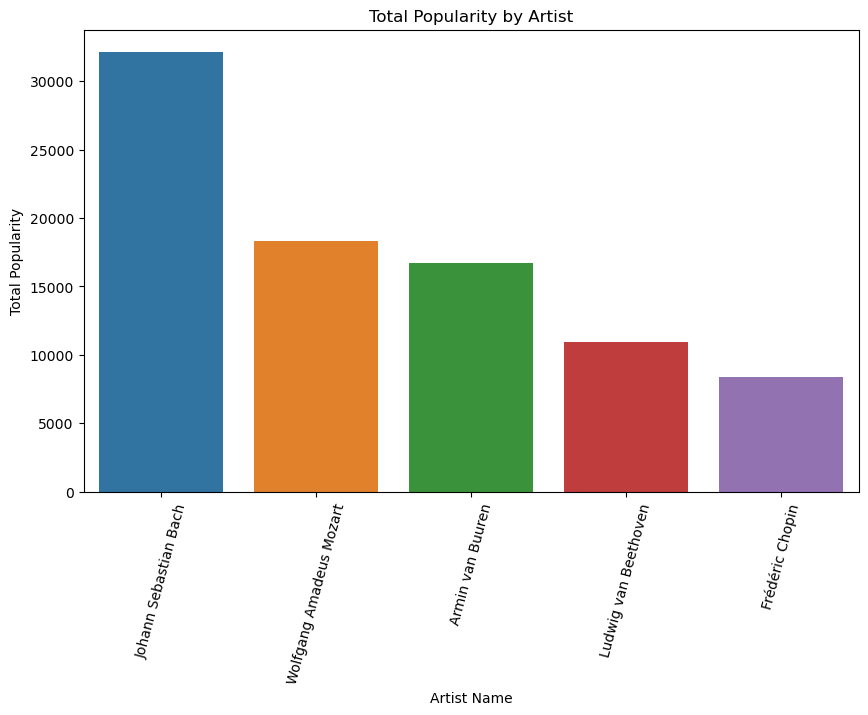

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_df_1.index, y=filtered_df_1.values)
plt.xlabel("Artist Name")
plt.ylabel("Total Popularity")
plt.title("Total Popularity by Artist")
plt.xticks(rotation=75)
plt.show()

In [95]:
df.valence=pd.to_numeric(df.valence,errors="coerce")
filtered_df_2=df.groupby(["artist_name"])["valence"].sum().sort_values(ascending=False).head()

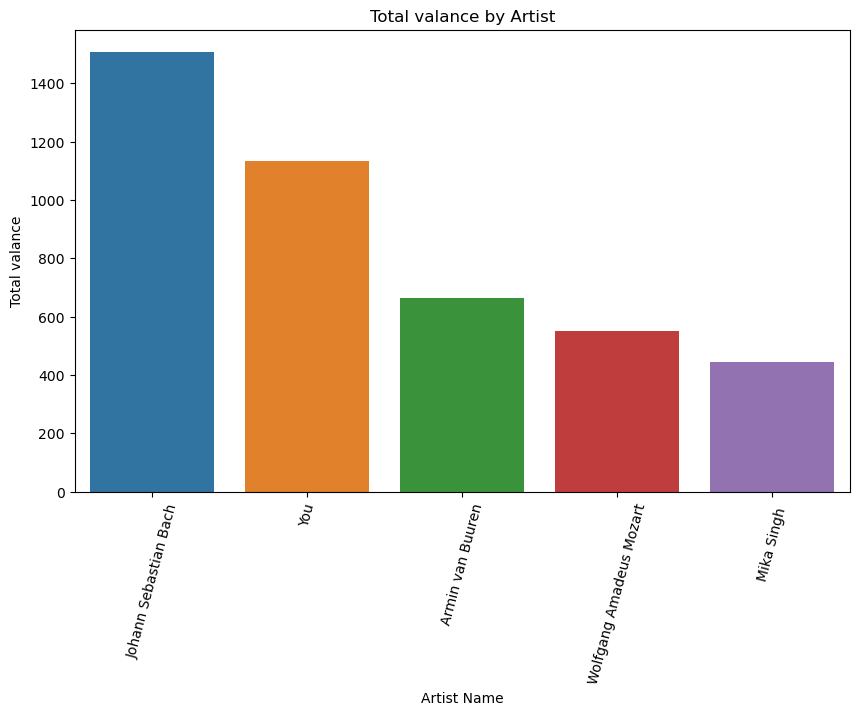

In [96]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_df_2.index, y=filtered_df_2.values)
plt.xlabel("Artist Name")
plt.ylabel("Total valance")
plt.title("Total valance by Artist")
plt.xticks(rotation=75)
plt.show()

In [98]:
df.danceability=pd.to_numeric(df.danceability,errors="coerce")
filtered_df_3=df.groupby(["artist_name"])["danceability"].sum().sort_values(ascending=False).head()

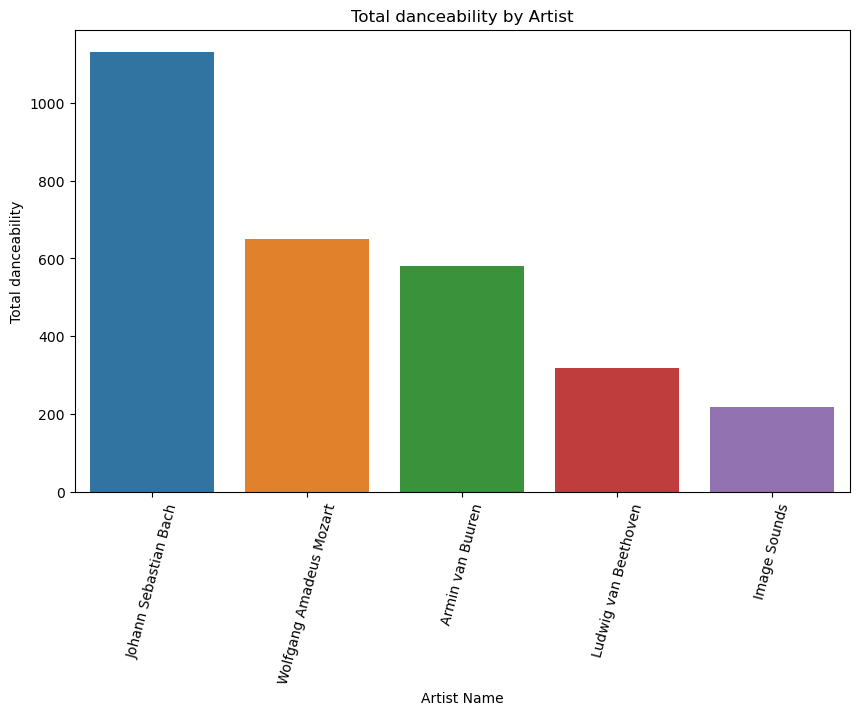

In [100]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_df_3.index, y=filtered_df_3.values)
plt.xlabel("Artist Name")
plt.ylabel("Total danceability")
plt.title("Total danceability by Artist")
plt.xticks(rotation=75)
plt.show()

In [105]:
df.instrumentalness=pd.to_numeric(df.instrumentalness,errors="coerce")
filtered_df_4=df.groupby(["artist_name"])["instrumentalness"].sum().sort_values(ascending=False).head(10)

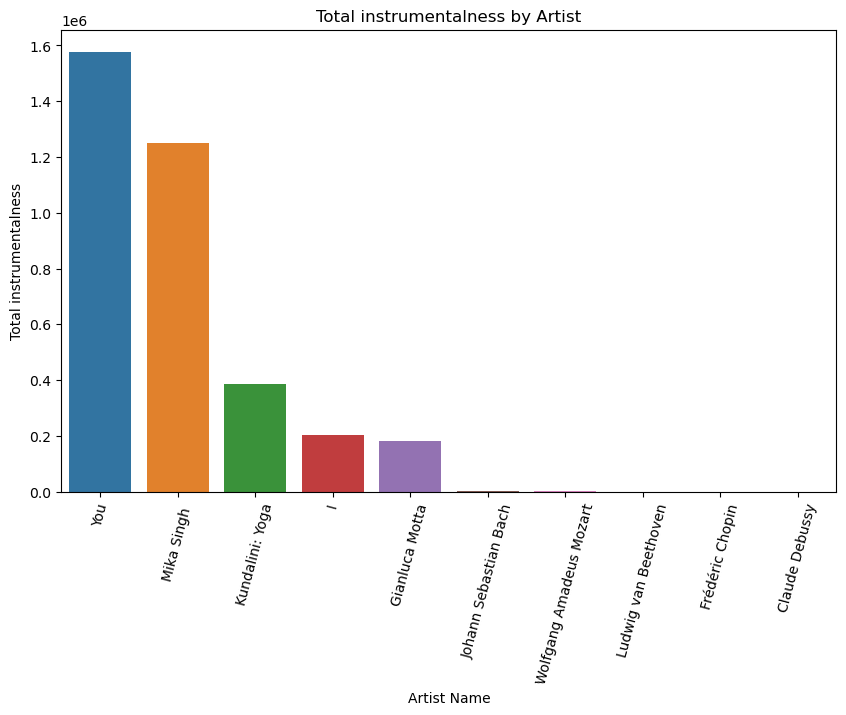

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_df_4.index, y=filtered_df_4.values)
plt.xlabel("Artist Name")
plt.ylabel("Total instrumentalness")
plt.title("Total instrumentalness by Artist")
plt.xticks(rotation=75)
plt.show()

In [74]:
df.acousticness=pd.to_numeric(df.acousticness,errors="coerce")

filtered_df=df[df["popularity"]>70].groupby(["track_name"]).sum()["acousticness"].to_frame().head(10)

C:\Users\salih\AppData\Local\Temp\ipykernel_33096\3310931308.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df=df[df["popularity"]>70].groupby(["track_name"]).sum()["acousticness"].to_frame().head(10)


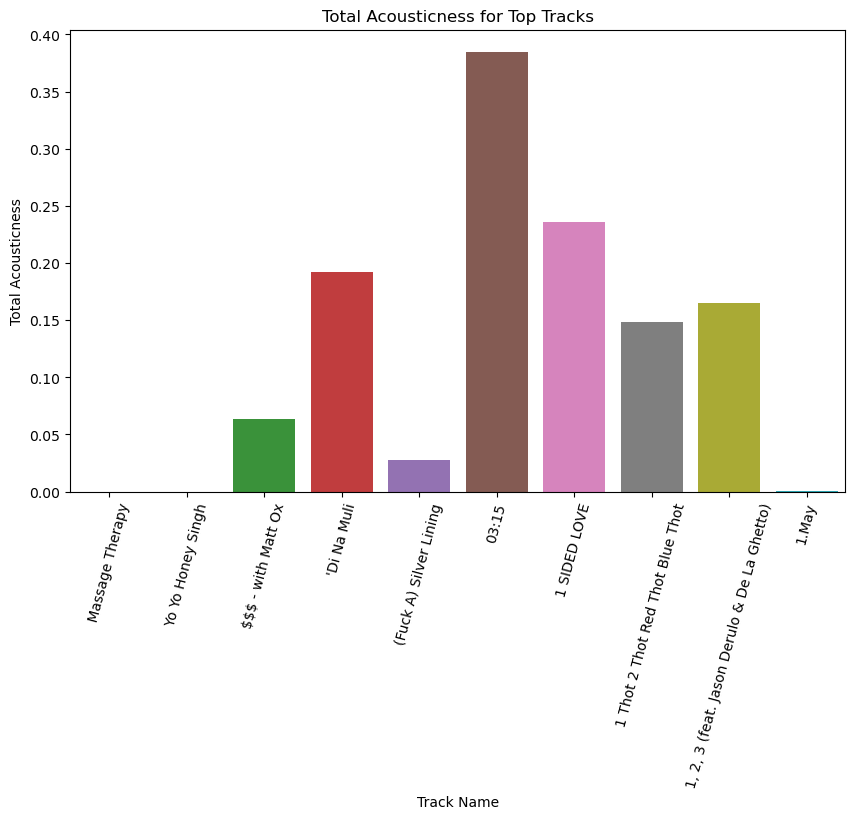

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=filtered_df.index, y="acousticness", data=filtered_df)
plt.xticks(rotation=75)
plt.xlabel("Track Name")
plt.ylabel("Total Acousticness")
plt.title("Total Acousticness for Top Tracks")
plt.show()

In [83]:
plt.savefig("acousticness_plot.png", dpi=300, bbox_inches="tight")

<Figure size 640x480 with 0 Axes>